**OBJECTIVE:** Run VIMuRe on OECD data

**AUTHOR:** [@jonjoncardoso](https://jonjoncardoso.github.io)

**DATE:** 29/06/2023 (during INSNA Sunbelt 2023)

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import vimure as vm

**Read the edgelist**

In [2]:
# Set the folder where the data is stored
DATA_FOLDER = '../../data/OECD'

edgelist = pd.read_csv(f'{DATA_FOLDER}/edgelist-OECD-WTO_BATIS_BPM6_April2023_bulk.csv')

# 1. Log-transform the `weight` first

Let's first check the data distribution of the OECD `weight`:

<Axes: >

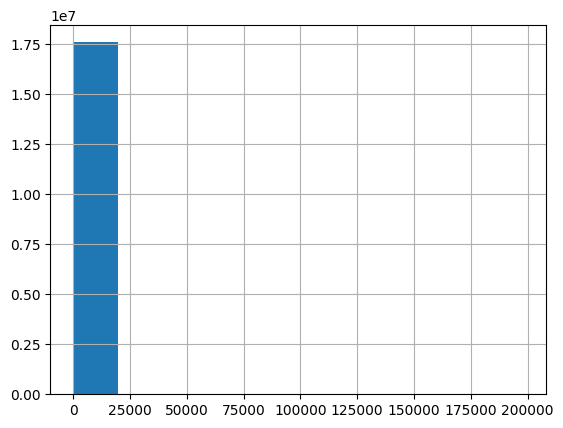

In [3]:
edgelist['weight'].hist()

In [4]:
edgelist['weight'].describe()

count    1.757652e+07
mean     1.788848e+01
std      3.898445e+02
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e-03
75%      2.000000e-01
max      1.983430e+05
Name: weight, dtype: float64

Let's log-transform the `weight` and observe the distribution:

<Axes: >

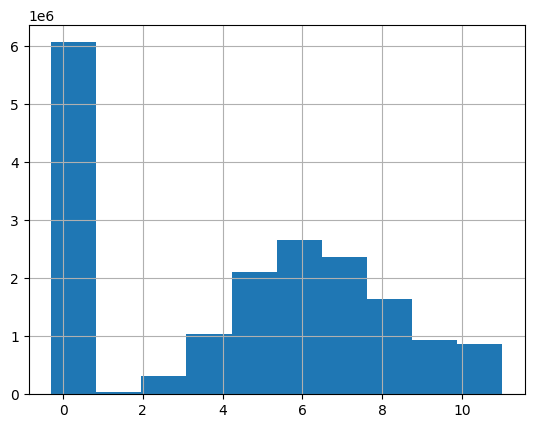

In [5]:
edgelist.assign(log_weight=lambda x: [-np.log10(weight/1e5) if weight > 0 else 0 for weight in x['weight']]).log_weight.hist()

Let's make this change permanent in this notebook:

In [6]:
edgelist['weight'] = edgelist['weight'].apply(lambda weight: -np.log10(weight/1e5) if weight > 0 else 0)

In [7]:
edgelist.head()

,ego,alter,reporter,tie_type,layer,weight
0,ABW,AFG,ABW,EXP,2005-S,5.712494
1,ABW,AFG,ABW,EXP,2006-S,5.705772
2,ABW,AFG,ABW,EXP,2007-S,5.636999
3,ABW,AFG,ABW,EXP,2008-S,5.578023
4,ABW,AFG,ABW,EXP,2009-S,5.552445


# 2. Run VIMuRe

## 2.1 Small sample: 2021

In [8]:
sample_edgelist = edgelist[edgelist['layer'].apply(lambda x: '2021' in x)]
sample_edgelist = sample_edgelist[sample_edgelist['weight'] > 0]
sample_edgelist['layer'].value_counts()

2021-S     75735
2021-SC    74924
2021-SD    73674
2021-SJ    70956
2021-SI    70292
2021-SF    61423
2021-SL    60337
2021-SG    59902
2021-SK    48018
2021-SE    44129
2021-SH    43394
2021-SB    42775
2021-SA    19579
Name: layer, dtype: int64

In [9]:
model = vm.model.VimureModel().fit(sample_edgelist, K=11)

c:\Users\Jon\miniconda3\envs\venv-vimure\lib\site-packages\vimure\_io.py:405: UserWarning: The set of nodes was not informed, using ego and alter columns to infer nodes.
  warnings.warn(msg, UserWarning)
c:\Users\Jon\miniconda3\envs\venv-vimure\lib\site-packages\vimure\_io.py:431: UserWarning: The set of reporters was not informed, assuming set(reporters) = set(nodes) and N = M.
  warnings.warn(msg, UserWarning)


c:\Users\Jon\miniconda3\envs\venv-vimure\lib\site-packages\vimure\_io.py:220: UserWarning: Reporters Mask was not informed (parameter R). Parser will build it from reporter column, assuming a reporter can only report their own ties.
  warnings.warn(msg, UserWarning)
c:\Users\Jon\miniconda3\envs\venv-vimure\lib\site-packages\vimure\_io.py:291: UserWarning: Parameter K was None. Defaulting to: 2
  warnings.warn(msg, UserWarning)


In [ ]:
import pickle

pickle.dump(model, open(f'{DATA_FOLDER}/model-OECD-WTO_BATIS_BPM6_April2023_bulk.pkl', 'wb'))